In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

dataset = datasets.load_linnerud()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0
5,4.0,101.0,42.0
6,8.0,101.0,38.0
7,6.0,125.0,40.0
8,15.0,200.0,40.0
9,17.0,251.0,250.0


In [2]:
print(dataset.keys())

dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [3]:
df.columns

Index(['Chins', 'Situps', 'Jumps'], dtype='object')

In [4]:
df.shape

(20, 3)

In [5]:
df_target = dataset.target
df_target

array([[191.,  36.,  50.],
       [189.,  37.,  52.],
       [193.,  38.,  58.],
       [162.,  35.,  62.],
       [189.,  35.,  46.],
       [182.,  36.,  56.],
       [211.,  38.,  56.],
       [167.,  34.,  60.],
       [176.,  31.,  74.],
       [154.,  33.,  56.],
       [169.,  34.,  50.],
       [166.,  33.,  52.],
       [154.,  34.,  64.],
       [247.,  46.,  50.],
       [193.,  36.,  46.],
       [202.,  37.,  62.],
       [176.,  37.,  54.],
       [157.,  32.,  52.],
       [156.,  33.,  54.],
       [138.,  33.,  68.]])

In [6]:
df['label'] = dataset.target[:,1]

In [7]:
df

,Chins,Situps,Jumps,label
0,5.0,162.0,60.0,36.0
1,2.0,110.0,60.0,37.0
2,12.0,101.0,101.0,38.0
3,12.0,105.0,37.0,35.0
4,13.0,155.0,58.0,35.0
5,4.0,101.0,42.0,36.0
6,8.0,101.0,38.0,38.0
7,6.0,125.0,40.0,34.0
8,15.0,200.0,40.0,31.0
9,17.0,251.0,250.0,33.0


In [8]:
X = df.iloc[:,0:3].values
y = df.iloc[:,3].values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [9]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [10]:
X

array([[  5., 162.,  60.],
       [  2., 110.,  60.],
       [ 12., 101., 101.],
       [ 12., 105.,  37.],
       [ 13., 155.,  58.],
       [  4., 101.,  42.],
       [  8., 101.,  38.],
       [  6., 125.,  40.],
       [ 15., 200.,  40.],
       [ 17., 251., 250.],
       [ 17., 120.,  38.],
       [ 13., 210., 115.],
       [ 14., 215., 105.],
       [  1.,  50.,  50.],
       [  6.,  70.,  31.],
       [ 12., 210., 120.],
       [  4.,  60.,  25.],
       [ 11., 230.,  80.],
       [ 15., 225.,  73.],
       [  2., 110.,  43.]])

In [11]:
y

array([36., 37., 38., 35., 35., 36., 38., 34., 31., 33., 34., 33., 34.,
       46., 36., 37., 37., 32., 33., 33.])

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation = 'relu', input_shape = (3,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               512       
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [23]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
1/1 [==============================] - 1s 548ms/step - loss: 1286.9711 - mse: 1286.9711 - val_loss: 1100.8093 - val_mse: 1100.8093
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 1267.5242 - mse: 1267.5242 - val_loss: 1087.9863 - val_mse: 1087.9863
Epoch 3/100
1/1 [==============================] - 0s 35ms/step - loss: 1252.8247 - mse: 1252.8247 - val_loss: 1075.8635 - val_mse: 1075.8635
Epoch 4/100
1/1 [==============================] - 0s 40ms/step - loss: 1239.7809 - mse: 1239.7809 - val_loss: 1064.1104 - val_mse: 1064.1104
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 1227.5999 - mse: 1227.5999 - val_loss: 1052.8572 - val_mse: 1052.8572
Epoch 6/100
1/1 [==============================] - 0s 35ms/step - loss: 1215.7856 - mse: 1215.7856 - val_loss: 1041.4390 - val_mse: 1041.4390
Epoch 7/100
1/1 [==============================] - 0s 39ms/step - loss: 1203.7363 - mse: 1203.7363 - val_loss: 1030.4309 - val_mse: 1030.4309
Epoch

In [24]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 31ms/step - loss: 8.9823 - mse: 8.9823


[8.982340812683105, 8.982340812683105]

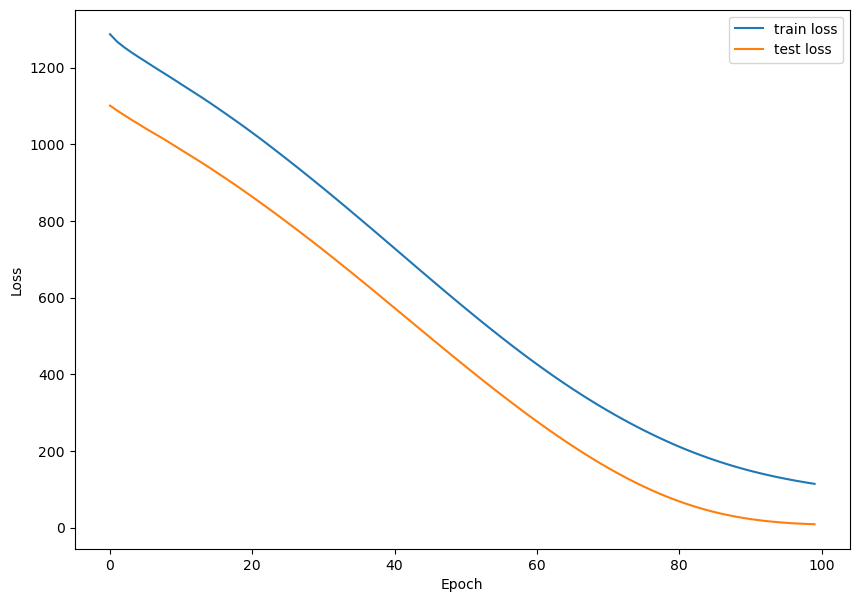

In [25]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

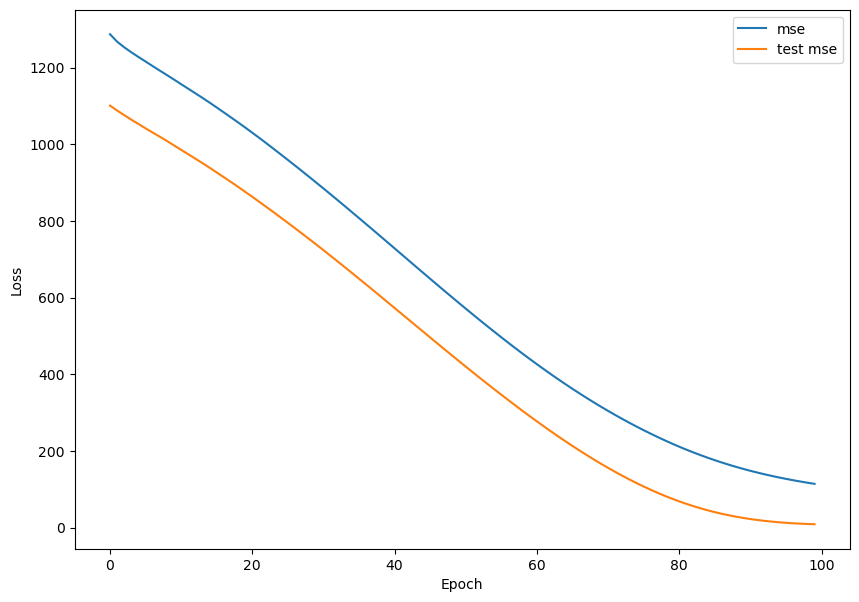

In [26]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()